In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
data=pd.read_excel('dataset.xlsx')

In [3]:
data

,Leff,Vth,Tox,Vdd,Power dissipation (W),Delay (s)
0,2.760000e-09,0.54059,1.510000e-09,0.75903,0.000018,1.920000e-09
1,2.390000e-09,0.47624,1.590000e-09,0.76943,0.000018,1.480000e-09
2,2.980000e-09,0.38132,1.540000e-09,0.83163,0.000023,1.180000e-09
3,2.400000e-09,0.52081,1.580000e-09,0.84360,0.000022,1.510000e-09
4,3.550000e-09,0.44354,1.630000e-09,0.74524,0.000012,2.540000e-09
...,...,...,...,...,...,...
948,3.210000e-09,0.49122,1.720000e-09,0.88610,0.000028,9.860000e-10
949,2.790000e-09,0.53629,1.500000e-09,0.92526,0.000031,1.310000e-09
950,2.610000e-09,0.53583,1.590000e-09,1.23340,0.000107,2.200000e-11
951,2.330000e-09,0.37867,1.620000e-09,1.00740,0.000039,2.580000e-09


In [4]:
data['Leff(nm)']=data.Leff*1e9

In [5]:
data['Tox(nm)']=data.Tox*1e9

In [6]:
data['Delay(ns)']=data['Delay (s)']*1e9

In [7]:
data['Power dissipation(uW)']=data['Power dissipation (W)']*1e6

In [8]:
data

,Leff,Vth,Tox,Vdd,Power dissipation (W),Delay (s),Leff(nm),Tox(nm),Delay(ns),Power dissipation(uW)
0,2.760000e-09,0.54059,1.510000e-09,0.75903,0.000018,1.920000e-09,2.76,1.51,1.920,18.100
1,2.390000e-09,0.47624,1.590000e-09,0.76943,0.000018,1.480000e-09,2.39,1.59,1.480,17.900
2,2.980000e-09,0.38132,1.540000e-09,0.83163,0.000023,1.180000e-09,2.98,1.54,1.180,22.700
3,2.400000e-09,0.52081,1.580000e-09,0.84360,0.000022,1.510000e-09,2.40,1.58,1.510,22.200
4,3.550000e-09,0.44354,1.630000e-09,0.74524,0.000012,2.540000e-09,3.55,1.63,2.540,11.600
...,...,...,...,...,...,...,...,...,...,...
948,3.210000e-09,0.49122,1.720000e-09,0.88610,0.000028,9.860000e-10,3.21,1.72,0.986,28.000
949,2.790000e-09,0.53629,1.500000e-09,0.92526,0.000031,1.310000e-09,2.79,1.50,1.310,30.900
950,2.610000e-09,0.53583,1.590000e-09,1.23340,0.000107,2.200000e-11,2.61,1.59,0.022,107.421
951,2.330000e-09,0.37867,1.620000e-09,1.00740,0.000039,2.580000e-09,2.33,1.62,2.580,39.100


In [9]:
data.columns

Index(['Leff', 'Vth', 'Tox', 'Vdd', 'Power dissipation (W)', 'Delay (s)',
       'Leff(nm)', 'Tox(nm)', 'Delay(ns)', 'Power dissipation(uW)'],
      dtype='object')

In [10]:
data.drop(['Leff', 'Tox', 'Power dissipation (W)', 'Delay (s)'],axis=1,inplace=True)

In [11]:
data

,Vth,Vdd,Leff(nm),Tox(nm),Delay(ns),Power dissipation(uW)
0,0.54059,0.75903,2.76,1.51,1.920,18.100
1,0.47624,0.76943,2.39,1.59,1.480,17.900
2,0.38132,0.83163,2.98,1.54,1.180,22.700
3,0.52081,0.84360,2.40,1.58,1.510,22.200
4,0.44354,0.74524,3.55,1.63,2.540,11.600
...,...,...,...,...,...,...
948,0.49122,0.88610,3.21,1.72,0.986,28.000
949,0.53629,0.92526,2.79,1.50,1.310,30.900
950,0.53583,1.23340,2.61,1.59,0.022,107.421
951,0.37867,1.00740,2.33,1.62,2.580,39.100


<AxesSubplot:ylabel='Frequency'>

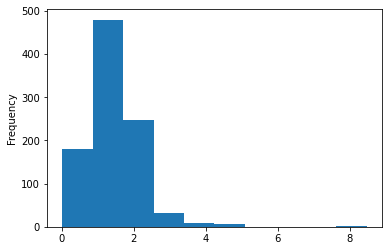

In [62]:
data['Delay(ns)'].plot(kind='hist')

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [64]:
coeff=data.corr()

In [65]:
coeff

,Vth,Vdd,Leff(nm),Tox(nm),Delay(ns),Power dissipation(uW)
Vth,1.000000,-0.030671,-0.031737,-0.040218,-0.013054,-0.002430
Vdd,-0.030671,1.000000,-0.030037,-0.034033,-0.493775,0.826846
Leff(nm),-0.031737,-0.030037,1.000000,0.028921,0.018920,-0.036929
Tox(nm),-0.040218,-0.034033,0.028921,1.000000,0.002537,-0.026654
Delay(ns),-0.013054,-0.493775,0.018920,0.002537,1.000000,-0.633205
Power dissipation(uW),-0.002430,0.826846,-0.036929,-0.026654,-0.633205,1.000000


#### Dependencies of the parameters on one another.

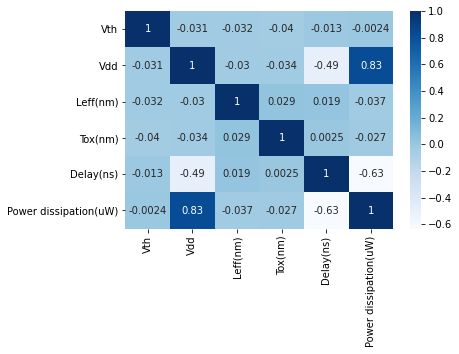

In [66]:
sns.heatmap(coeff, annot=True, cmap='Blues');

c:\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


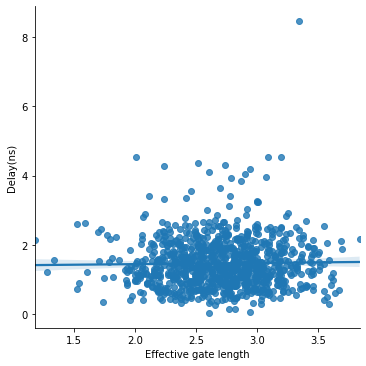

In [67]:
sns.lmplot('Leff(nm)', 'Delay(ns)', data)

plt.xlabel("Effective gate length")
plt.ylabel("Delay(ns)");

c:\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


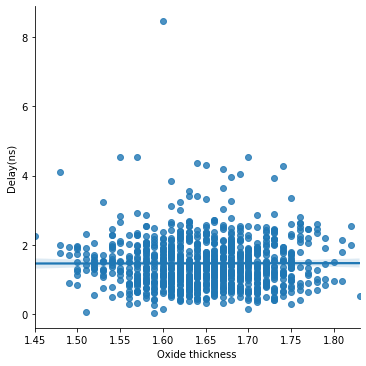

In [68]:
sns.lmplot('Tox(nm)', 'Delay(ns)', data)

plt.xlabel("Oxide thickness")
plt.ylabel("Delay(ns)");

c:\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


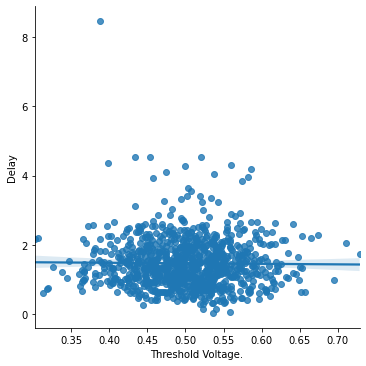

In [69]:
sns.lmplot('Vth', 'Delay(ns)', data)

plt.xlabel("Threshold Voltage.")
plt.ylabel("Delay");

c:\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


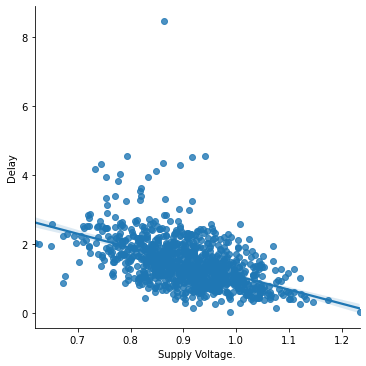

In [70]:
sns.lmplot('Vdd', 'Delay(ns)', data)

plt.xlabel("Supply Voltage.")
plt.ylabel("Delay");

c:\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


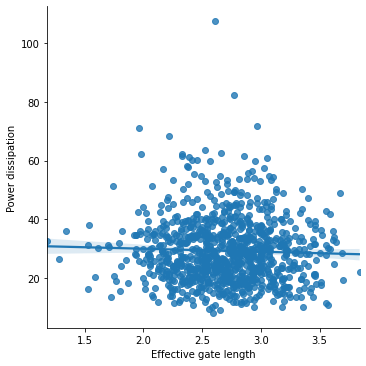

In [71]:
sns.lmplot('Leff(nm)', 'Power dissipation(uW)', data)

plt.xlabel("Effective gate length")
plt.ylabel("Power dissipation");

c:\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


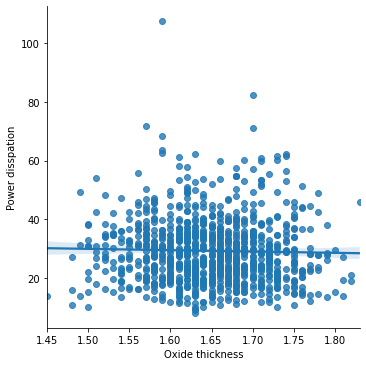

In [72]:
sns.lmplot('Tox(nm)', 'Power dissipation(uW)', data)

plt.xlabel("Oxide thickness")
plt.ylabel("Power disspation");

c:\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


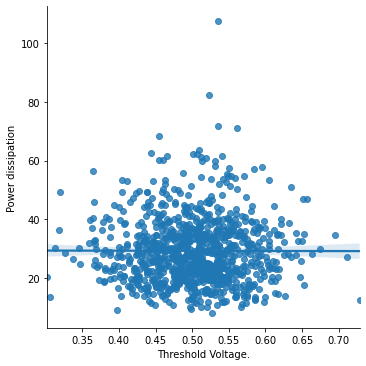

In [73]:
sns.lmplot('Vth', 'Power dissipation(uW)', data)

plt.xlabel("Threshold Voltage.")
plt.ylabel("Power dissipation");

c:\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


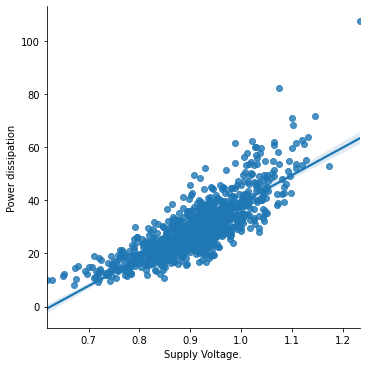

In [74]:
sns.lmplot('Vdd', 'Power dissipation(uW)', data)

plt.xlabel("Supply Voltage.")
plt.ylabel("Power dissipation");

<AxesSubplot:>

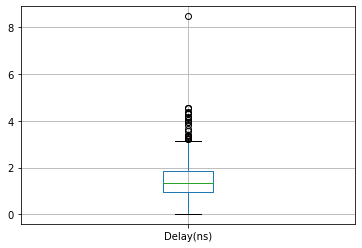

In [75]:
data.boxplot('Delay(ns)')

In [13]:
data[data['Delay(ns)']>6.00]

,Vth,Vdd,Leff(nm),Tox(nm),Delay(ns),Power dissipation(uW)
9,0.38827,0.86317,3.34,1.6,8.47,19.7


In [14]:
delay_indices=data[data['Delay(ns)']>6.00].index

In [15]:
data.loc[delay_indices,'Delay(ns)']=0

In [16]:
for ind in delay_indices:
    leff=data.loc[ind,'Leff(nm)']
    mu=data[(data['Leff(nm)']>leff-0.2) & (data['Leff(nm)']<leff+0.2) & (data['Delay(ns)']!=0)]['Delay(ns)'].mean()
    data.loc[ind,'Delay(ns)']=mu

In [17]:
data.loc[delay_indices]

,Vth,Vdd,Leff(nm),Tox(nm),Delay(ns),Power dissipation(uW)
9,0.38827,0.86317,3.34,1.6,1.524116,19.7


c:\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


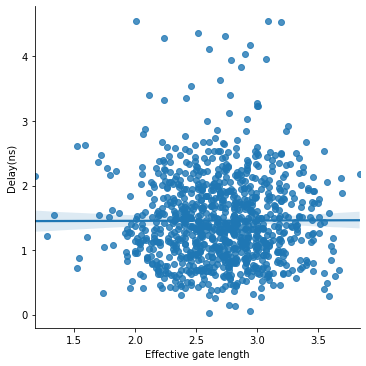

In [81]:
sns.lmplot('Leff(nm)', 'Delay(ns)', data)

plt.xlabel("Effective gate length")
plt.ylabel("Delay(ns)");

<AxesSubplot:ylabel='Frequency'>

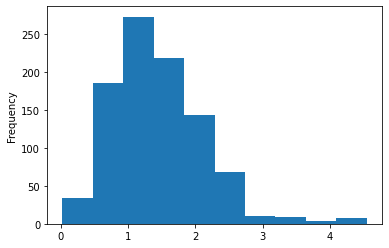

In [82]:
data['Delay(ns)'].plot(kind='hist')

<AxesSubplot:>

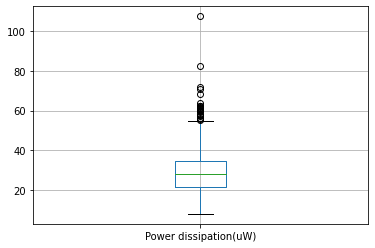

In [83]:
data.boxplot('Power dissipation(uW)')

In [18]:
data[data['Power dissipation(uW)']>75]

,Vth,Vdd,Leff(nm),Tox(nm),Delay(ns),Power dissipation(uW)
490,0.52345,1.0745,2.77,1.70,0.152,82.400
950,0.53583,1.2334,2.61,1.59,0.022,107.421


In [19]:
power_indices=data[data['Power dissipation(uW)'].isnull() | data['Power dissipation(uW)']>75].index

In [20]:
data.loc[power_indices,'Power dissipation(uW)']=0

In [21]:
for ind in power_indices:
    vdd=data.loc[ind,'Vdd']
    mu=data[(data['Vdd']>vdd-0.05) & (data['Vdd']<vdd+0.05) & (data['Power dissipation(uW)']!=0)]['Power dissipation(uW)'].mean()
    data.loc[ind,'Power dissipation(uW)']=mu

<AxesSubplot:ylabel='Frequency'>

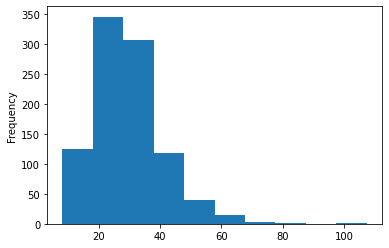

In [88]:
data['Power dissipation(uW)'].plot(kind='hist')

In [22]:
data.to_excel("processed_dataset.xlsx",sheet_name='dataset',index=False)

In [23]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [24]:
y_values = data[['Delay(ns)','Power dissipation(uW)']]

In [25]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data.drop(y_values.columns,axis=1))

In [28]:
data_scaled_df=pd.DataFrame(data_scaled,columns=list(data.columns)[:-2])

In [29]:
data_scaled_df

,Vth,Vdd,Leff(nm),Tox(nm)
0,0.559399,0.228917,0.593985,0.157895
1,0.408498,0.245822,0.454887,0.368421
2,0.185911,0.346928,0.676692,0.236842
3,0.513015,0.366385,0.458647,0.342105
4,0.331817,0.206502,0.890977,0.473684
...,...,...,...,...
948,0.443626,0.435468,0.763158,0.710526
949,0.549315,0.499122,0.605263,0.131579
950,0.548237,1.000000,0.537594,0.368421
951,0.179697,0.632640,0.432331,0.447368


In [30]:
data_scaled_df['Delay(ns)'],data_scaled_df['Power dissipation(uW)'] = y_values['Delay(ns)'],y_values['Power dissipation(uW)']

In [31]:
data_scaled_df.to_excel("scaled_dataset.xlsx",sheet_name='dataset1')

In [32]:
data_scaled_df

,Vth,Vdd,Leff(nm),Tox(nm),Delay(ns),Power dissipation(uW)
0,0.559399,0.228917,0.593985,0.157895,1.920,18.100
1,0.408498,0.245822,0.454887,0.368421,1.480,17.900
2,0.185911,0.346928,0.676692,0.236842,1.180,22.700
3,0.513015,0.366385,0.458647,0.342105,1.510,22.200
4,0.331817,0.206502,0.890977,0.473684,2.540,11.600
...,...,...,...,...,...,...
948,0.443626,0.435468,0.763158,0.710526,0.986,28.000
949,0.549315,0.499122,0.605263,0.131579,1.310,30.900
950,0.548237,1.000000,0.537594,0.368421,0.022,107.421
951,0.179697,0.632640,0.432331,0.447368,2.580,39.100
